# Métodos de Diferenciación numérica
### Luis Daniel Amador Islas

### 1. Diferenciación numérica.
Crea una función $\texttt{f(x)}$ que deuelva $1 + \frac{1}{2} \tanh 2x$. luego usa **diferencias centrales** para calcular numéricamente la derivada de la función en el intervalo $-2 \leq x \leq 2$.
Después, calcular la derivada analíticamente y haz una gŕafica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: Usa la función $\texttt{tanh}$ del paquete $\texttt{math}$)

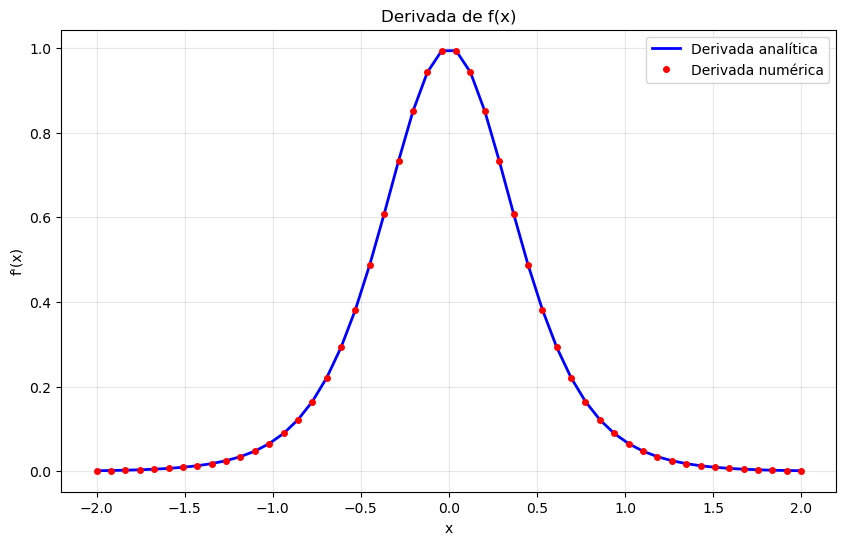

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import tanh
def f(x):
    return 1 + 0.5 * tanh(2 * x)

def derivada_analitica(x):
    return 1 - (tanh(2 * x))**2

def derivada_numerica(x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

x_vals = np.linspace(-2, 2, 50)

# Calcular derivadas
deriv_analitica = [derivada_analitica(x) for x in x_vals]
deriv_numerica = [derivada_numerica(x) for x in x_vals]

# Graficar
plt.figure(figsize=(10, 6))

plt.plot(x_vals, deriv_analitica, 'b-', linewidth=2, label='Derivada analítica')

plt.plot(x_vals, deriv_numerica, 'ro', markersize=4, label='Derivada numérica')

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title('Derivada de f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.Campo eléctrico de una distrbución de cargas

Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico $\phi$ y luego tomar su gradiente.

Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es $\phi = q/4\pi\epsilon_0 r$ y el campo eléctrico es $\bar{E} = -\nabla \phi$

_a)_ Suponiendo que tienes dos cargas de +1C y -1C respectivamente, separadas 10 cm. Calcula el potencial electrico resultante en un plano cuadrado de 1 m$\times$1 m que rodea las cargas y pasa atraves de ellas. Calcula el potencial en puntos espaciados a 1 cm en una cuadrícula y haz una visualización en la pantalla del potencial usando un gráfico de densidad.

Tenemos:

- Carga $q_1 = +1 \ \text{C}$ en posición $\vec{r}_1 = (0, 0, 0)$
- Carga $q_2 = -1 \ \text{C}$ en posición $\vec{r}_2 = (0.1, 0, 0)$ metros (10 cm de separación en el eje $x$)
- Constante $k = \frac{1}{4\pi\epsilon_0} \approx 8.9875\times 10^9 \ \text{N·m}^2/\text{C}^2$

Queremos el potencial eléctrico en un plano cuadrado de $1 \text{ m} \times 1 \text{ m}$ que pasa a través de las cargas, con puntos espaciados cada 1 cm.

El potencial debido a $N$ cargas puntuales en un punto $\vec{r}$ es:

$$
\phi(\vec{r}) = \sum_{i=1}^N \frac{k \, q_i}{|\vec{r} - \vec{r}_i|}
$$

Para dos cargas:

$$
\phi(x, y, z) = k\left[ \frac{q_1}{\sqrt{(x - x_1)^2 + (y - y_1)^2 + (z - z_1)^2}} + \frac{q_2}{\sqrt{(x - x_2)^2 + (y - y_2)^2 + (z - z_2)^2}} \right]
$$

En nuestro caso:

$$
\phi(x, y, 0) = k\left[ \frac{+1}{\sqrt{x^2 + y^2}} + \frac{-1}{\sqrt{(x - 0.1)^2 + y^2}} \right]
$$

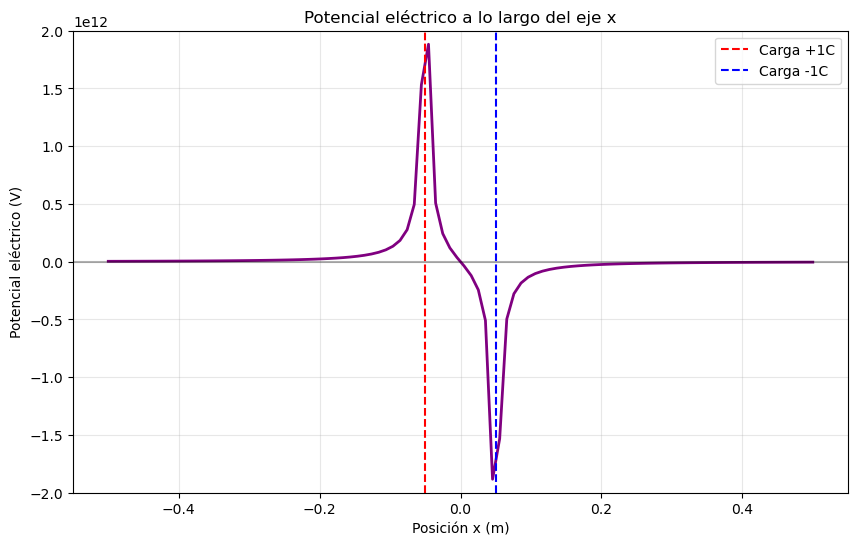

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb
k = 8.9875e9

x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)

# Calcular potencial en cada punto
potencial = []
for pos in x:
    # Distancia a la carga +1C en x = -0.05
    r1 = abs(pos - (-0.05))
    # Distancia a la carga -1C en x = 0.05
    r2 = abs(pos - 0.05)
    
    if r1 < 0.001:
        potencial.append(1e15)
    elif r2 < 0.001:
        potencial.append(-1e15)
    else:
        # φ = k*(q1/r1 + q2/r2)
        phi = k * (1/r1 - 1/r2)
        potencial.append(phi)

plt.figure(figsize=(10, 6))
plt.plot(x, potencial, 'purple', linewidth=2)
plt.axvline(x=-0.05, color='red', linestyle='--', label='Carga +1C')
plt.axvline(x=0.05, color='blue', linestyle='--', label='Carga -1C')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Posición x (m)')
plt.ylabel('Potencial eléctrico (V)')
plt.title('Potencial eléctrico a lo largo del eje x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2e12, 2e12)  # Límites para mejor visualización
plt.show()


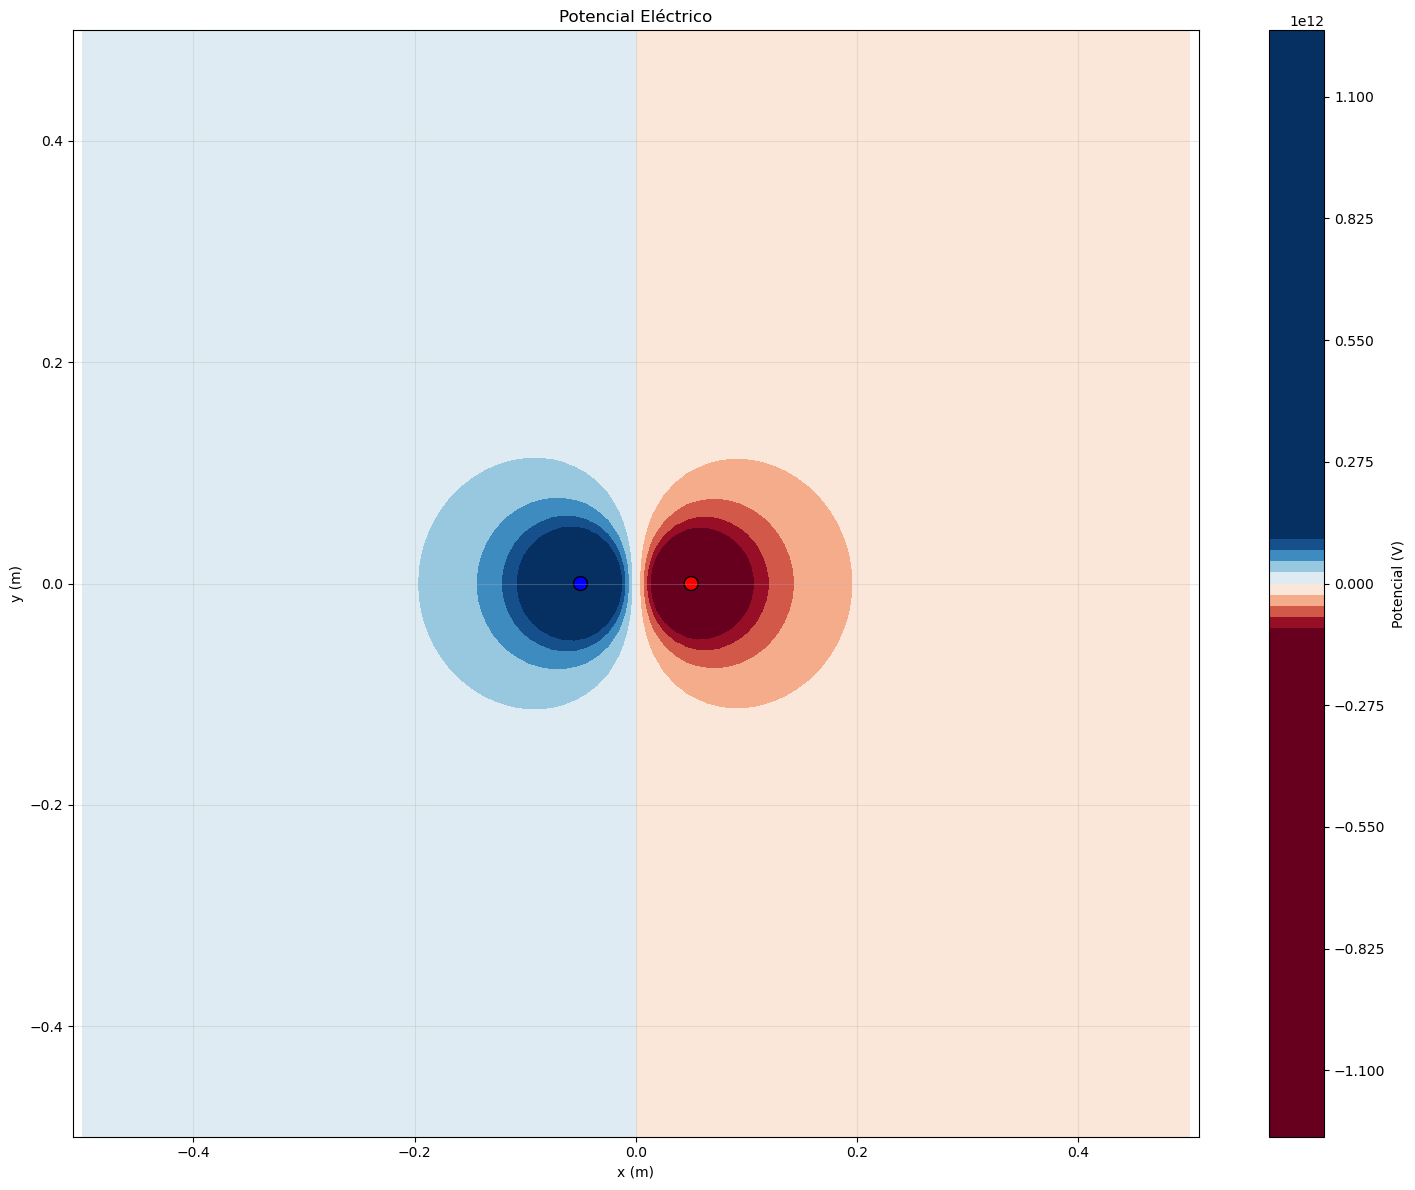

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb
k = 8.9875e9

x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)

# Calcular potencial en cada punto de la malla 2D
V = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        # Distancia a la carga +1C en (-0.05, 0)
        r1 = np.sqrt((X[i,j] - (-0.05))**2 + (Y[i,j] - 0)**2)
        # Distancia a la carga -1C en (0.05, 0)
        r2 = np.sqrt((X[i,j] - 0.05)**2 + (Y[i,j] - 0)**2)
        
        if r1 < 0.001:
            V[i,j] = 1e15
        elif r2 < 0.001:
            V[i,j] = -1e15
        else:
            # φ = k*(q1/r1 + q2/r2)
            V[i,j] = k * (1/r1 - 1/r2)

# Crear figura
plt.figure(figsize=(15, 12))

# Crear contour plot acotado con colormap 'hot'
contour = plt.contourf(X, Y, V, levels=100, cmap='RdBu', vmin=-1e11, vmax=1e11)
plt.colorbar(contour, label='Potencial (V)')
plt.scatter([-0.05, 0.05], [0, 0], c=['blue', 'red'], s=100, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial Eléctrico')
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

_b)_ Ahora calcula las derivadas parciales del potencial con respecto a x y y, para encontrar el campo eléctrico en el plano $x$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
k = 8.9875e9

x = np.linspace(-0.5, 0.5, 50)
y = np.linspace(-0.5, 0.5, 50)
X, Y = np.meshgrid(x, y)

# Espaciado de la cuadrícula
h = x[1] - x[0]  # mismo espaciado en x e y

V = np.zeros_like(X)

q1_pos = [-0.05, 0]  # Carga -1C
q2_pos = [0.05, 0]   # Carga +1C

# Calcular potencial en cada punto
for i in range(len(x)):
    for j in range(len(y)):
        # Vector posición del punto
        rx = X[j,i]
        ry = Y[j,i]
        
        # Distancia a carga -1C
        r1 = np.sqrt((rx - q1_pos[0])**2 + (ry - q1_pos[1])**2)
        
        # Distancia a carga +1C
        r2 = np.sqrt((rx - q2_pos[0])**2 + (ry - q2_pos[1])**2)

        if r1 < 0.01:
            V[j,i] = 1e15
        elif r2 < 0.01:
            V[j,i] = -1e15
        else:
            V[j,i] = k * (1.0/r1 - 1.0/r2)

# E = -∇V = -(∂V/∂x, ∂V/∂y)
Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        # Derivada parcial respecto a x
        dV_dx = (V[j, i+1] - V[j, i-1]) / (2 * h)
        # Derivada parcial respecto a y  
        dV_dy = (V[j+1, i] - V[j-1, i]) / (2 * h)
        
        Ex[j, i] = -dV_dx
        Ey[j, i] = -dV_dy

# Calcular magnitud y dirección del campo
magnitud = np.sqrt(Ex**2 + Ey**2)
direccion = np.arctan2(Ey, Ex)

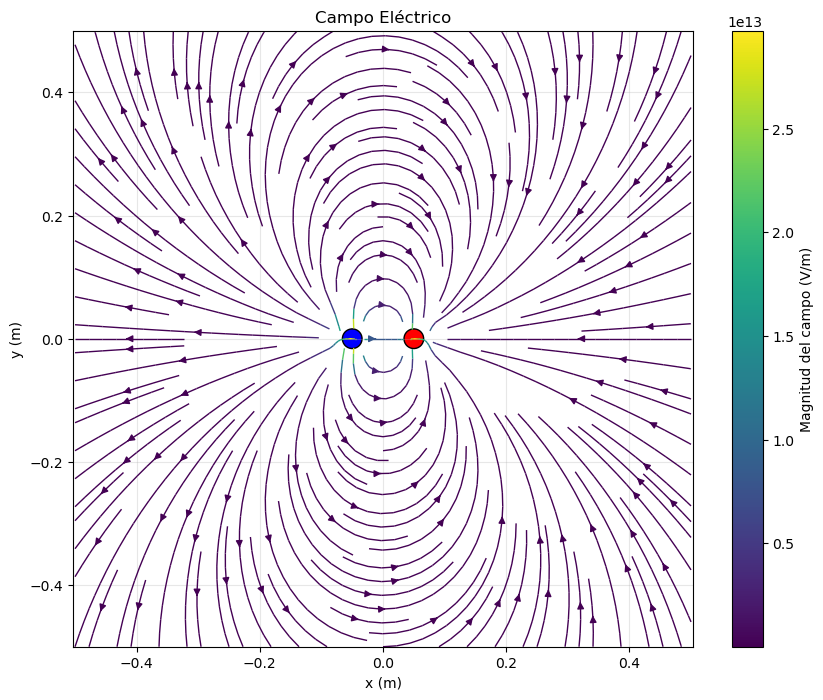

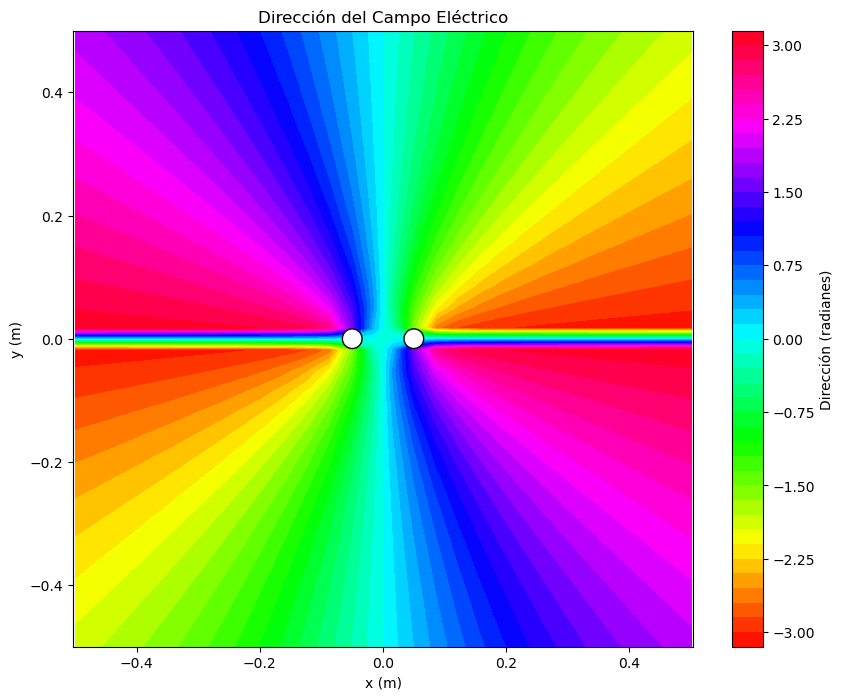

In [24]:
import numpy as np


# Cargar los datos calculados
datos = np.load('campo_electrico.npz')
X = datos['X']
Y = datos['Y']
Ex = datos['Ex']
Ey = datos['Ey']
magnitud = datos['magnitud']
direccion = datos['direccion']

#Flechas del campo eléctrico
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, Ex, Ey, color=magnitud, cmap='viridis', linewidth=1, density=1.5)
plt.colorbar(label='Magnitud del campo (V/m)')
plt.scatter([-0.05, 0.05], [0, 0], c=['blue', 'red'], s=200, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo Eléctrico')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

# Dirección del campo
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, direccion, levels=50, cmap='hsv')
plt.colorbar(label='Dirección (radianes)')
plt.scatter([-0.05, 0.05], [0, 0], c=['white', 'white'], s=200, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Dirección del Campo Eléctrico')
plt.axis('equal')
plt.show()


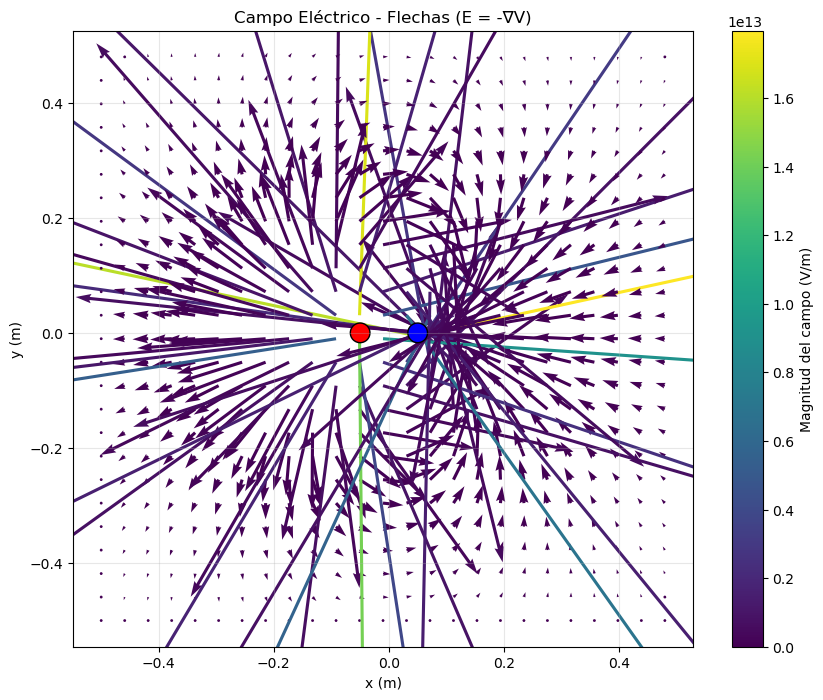

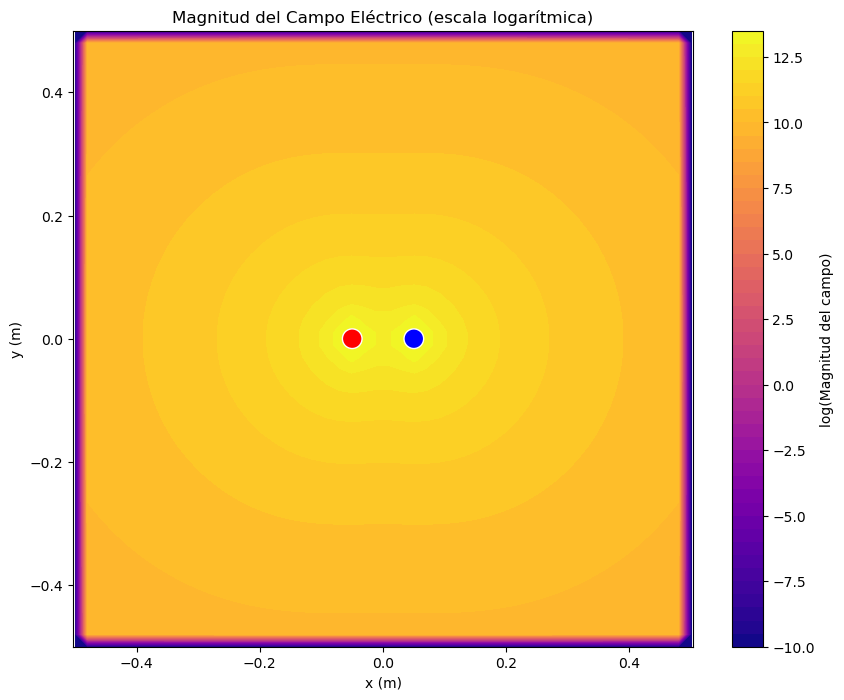

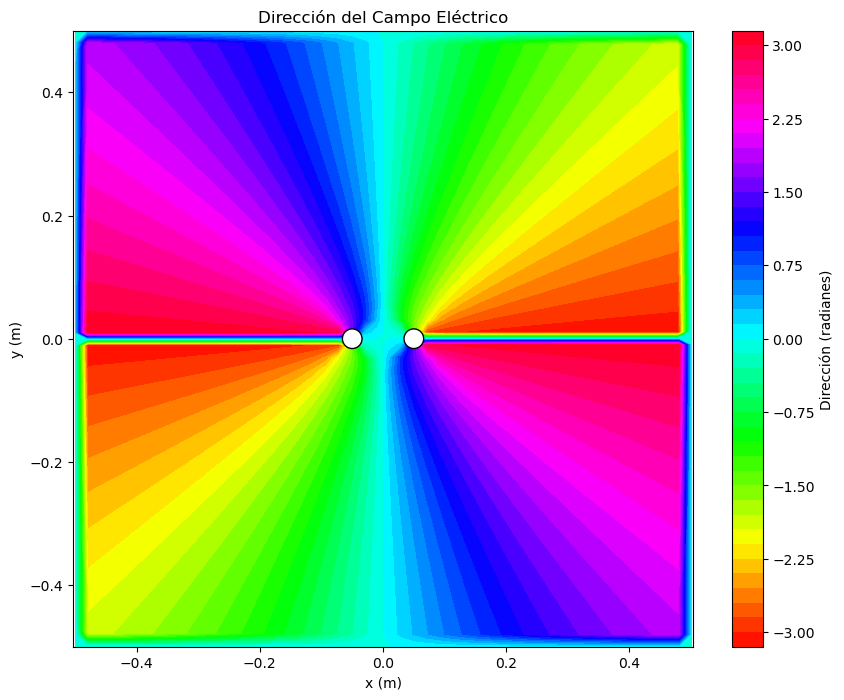


Valores de ejemplo calculados por derivadas numéricas:
Espaciado usado para derivadas: h = 0.0204 m


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos calculados
datos = np.load('campo_electrico_derivadas.npz')
X = datos['X']
Y = datos['Y']
V = datos['V']
Ex = datos['Ex']
Ey = datos['Ey']
magnitud = datos['magnitud']
direccion = datos['direccion']
h = datos['h']

# Visualización 2: Campo eléctrico - Flechas
plt.figure(figsize=(10, 8))
# Usar quiver para flechas del campo eléctrico
plt.quiver(X[::2, ::2], Y[::2, ::2], Ex[::2, ::2], Ey[::2, ::2], 
           magnitud[::2, ::2], cmap='viridis', scale=1e12, width=0.005)
plt.colorbar(label='Magnitud del campo (V/m)')
plt.scatter([-0.05, 0.05], [0, 0], c=['red', 'blue'], s=200, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo Eléctrico - Flechas (E = -∇V)')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

# Visualización 3: Magnitud del campo
plt.figure(figsize=(10, 8))
# Usar escala logarítmica para mejor visualización
magnitud_log = np.log10(magnitud + 1e-10)  # evitar log(0)
plt.contourf(X, Y, magnitud_log, levels=50, cmap='plasma')
plt.colorbar(label='log(Magnitud del campo)')
plt.scatter([-0.05, 0.05], [0, 0], c=['red', 'blue'], s=200, edgecolors='white')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Magnitud del Campo Eléctrico (escala logarítmica)')
plt.axis('equal')
plt.show()

# Visualización 4: Dirección del campo (esquema HSV)
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, direccion, levels=50, cmap='hsv')
plt.colorbar(label='Dirección (radianes)')
plt.scatter([-0.05, 0.05], [0, 0], c=['white', 'white'], s=200, edgecolors='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Dirección del Campo Eléctrico')
plt.axis('equal')
plt.show()

# Mostrar valores de ejemplo
print("\nValores de ejemplo calculados por derivadas numéricas:")
print(f"Espaciado usado para derivadas: h = {h:.4f} m")

# Encontrar punto cerca del centro
i_centro = len(x) // 2
j_centro = len(y) // 2


In [ ]:
_c)_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

print("=" * 70)
print("PROCESAMIENTO DE IMÁGENES Y CÁLCULO DE ILUMINACIÓN 3D")
print("=" * 70)

# a) Cargar los datos de altitud
print("\n1. CARGANDO DATOS DE ALTITUD...")
try:
    # Cargar los datos del archivo
    altitudes = np.loadtxt('altitudes.txt')
    print(f"Datos cargados exitosamente")
    print(f"Dimensiones de la matriz: {altitudes.shape}")
    print(f"Altitud mínima: {np.min(altitudes):.2f} m")
    print(f"Altitud máxima: {np.max(altitudes):.2f} m")
    print(f"Altitud promedio: {np.mean(altitudes):.2f} m")
except FileNotFoundError:
    print("Archivo 'altitudes.txt' no encontrado. Creando datos de ejemplo...")
    # Crear datos de ejemplo si el archivo no existe
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    altitudes = 1000 * np.exp(-0.3*(X**2 + Y**2)) + 500 * np.sin(0.5*X) * np.cos(0.5*Y)
    print("Datos de ejemplo creados")

# Parámetros físicos
dx = 30000  # 30,000 metros entre puntos de la cuadrícula
dy = 30000

print(f"\nEspaciado de la cuadrícula: dx = {dx} m, dy = {dy} m")

# b) Métodos para calcular derivadas
def calcular_derivadas_centrales(matriz, dx, dy):
    """
    Calcula derivadas usando diferencias centrales para puntos interiores
    y diferencias hacia adelante/atrás para los bordes
    """
    n_filas, n_columnas = matriz.shape
    dw_dx = np.zeros_like(matriz)
    dw_dy = np.zeros_like(matriz)
    
    # Puntos interiores: diferencias centrales (más precisas)
    for i in range(1, n_filas - 1):
        for j in range(1, n_columnas - 1):
            dw_dx[i, j] = (matriz[i, j+1] - matriz[i, j-1]) / (2 * dx)
            dw_dy[i, j] = (matriz[i+1, j] - matriz[i-1, j]) / (2 * dy)
    
    # Bordes superiores e inferiores
    for j in range(1, n_columnas - 1):
        # Fila superior: diferencia hacia adelante en y
        dw_dy[0, j] = (matriz[1, j] - matriz[0, j]) / dy
        # Fila inferior: diferencia hacia atrás en y
        dw_dy[-1, j] = (matriz[-1, j] - matriz[-2, j]) / dy
    
    # Bordes izquierdos y derechos
    for i in range(1, n_filas - 1):
        # Columna izquierda: diferencia hacia adelante en x
        dw_dx[i, 0] = (matriz[i, 1] - matriz[i, 0]) / dx
        # Columna derecha: diferencia hacia atrás en x
        dw_dx[i, -1] = (matriz[i, -1] - matriz[i, -2]) / dx
    
    # Esquinas (usando diferencias hacia adelante/atrás según corresponda)
    # Esquina superior izquierda
    dw_dx[0, 0] = (altitudes[0, 1] - altitudes[0, 0]) / dx
    dw_dy[0, 0] = (altitudes[1, 0] - altitudes[0, 0]) / dy
    
    # Esquina superior derecha
    dw_dx[0, -1] = (altitudes[0, -1] - altitudes[0, -2]) / dx
    dw_dy[0, -1] = (altitudes[1, -1] - altitudes[0, -1]) / dy
    
    # Esquina inferior izquierda
    dw_dx[-1, 0] = (altitudes[-1, 1] - altitudes[-1, 0]) / dx
    dw_dy[-1, 0] = (altitudes[-1, 0] - altitudes[-2, 0]) / dy
    
    # Esquina inferior derecha
    dw_dx[-1, -1] = (altitudes[-1, -1] - altitudes[-1, -2]) / dx
    dw_dy[-1, -1] = (altitudes[-1, -1] - altitudes[-2, -1]) / dy
    
    return dw_dx, dw_dy

def calcular_derivadas_scipy(matriz, dx, dy):
    """
    Calcula derivadas usando filtros de Sobel de scipy
    Útil para comparación y validación
    """
    # El filtro Sobel calcula derivadas aproximadas
    dw_dx = ndimage.sobel(matriz, axis=1) / (8 * dx)  # axis=1 para derivada en x
    dw_dy = ndimage.sobel(matriz, axis=0) / (8 * dy)  # axis=0 para derivada en y
    return dw_dx, dw_dy

# c) Calcular las derivadas usando ambos métodos
print("\n2. CALCULANDO DERIVADAS...")
print("Método 1: Diferencias finitas (manual)")
dw_dx_manual, dw_dy_manual = calcular_derivadas_centrales(altitudes, dx, dy)

print("Método 2: Filtro Sobel (scipy)")
dw_dx_sobel, dw_dy_sobel = calcular_derivadas_scipy(altitudes, dx, dy)

# d) Visualización de resultados
print("\n3. VISUALIZANDO RESULTADOS...")
plt.figure(figsize=(15, 10))

# Subplot 1: Altitud original
plt.subplot(2, 3, 1)
plt.imshow(altitudes, cmap='terrain', aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Mapa de Altitud Original')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 2: Derivada ∂w/∂x (manual)
plt.subplot(2, 3, 2)
plt.imshow(dw_dx_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 3: Derivada ∂w/∂y (manual)
plt.subplot(2, 3, 3)
plt.imshow(dw_dy_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 4: Comparación ∂w/∂x
plt.subplot(2, 3, 4)
plt.imshow(dw_dx_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 5: Comparación ∂w/∂y
plt.subplot(2, 3, 5)
plt.imshow(dw_dy_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 6: Magnitud del gradiente
magnitud_gradiente = np.sqrt(dw_dx_manual**2 + dw_dy_manual**2)
plt.subplot(2, 3, 6)
plt.imshow(magnitud_gradiente, cmap='viridis', aspect='auto')
plt.colorbar(label='|∇w| (m/m)')
plt.title('Magnitud del Gradiente')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.tight_layout()
plt.show()

# e) Análisis de resultados
print("\n4. ANÁLISIS DE LAS DERIVADAS")
print("=" * 50)

print("Método manual (diferencias finitas):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_manual):.6f}, max = {np.max(dw_dx_manual):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_manual):.6f}, max = {np.max(dw_dy_manual):.6f}")

print("\nMétodo Sobel (scipy):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_sobel):.6f}, max = {np.max(dw_dx_sobel):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_sobel):.6f}, max = {np.max(dw_dy_sobel):.6f}")

# f) Explicación del método utilizado
print("\n5. EXPLICACIÓN DEL MÉTODO")
print("=" * 50)
print("Se utilizó un enfoque híbrido para calcular las derivadas:")
print("\nA) PUNTOS INTERIORES:")
print("   - Diferencias centrales: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)")
print("   - Precisión: O(h²)")
print("   - Ventaja: Mayor precisión que diferencias hacia adelante/atrás")

print("\nB) BORDES Y ESQUINAS:")
print("   - Bordes horizontales: diferencias hacia adelante/atrás en y")
print("   - Bordes verticales: diferencias hacia adelante/atrás en x") 
print("   - Esquinas: combinación según posición")
print("   - Precisión: O(h)")
print("   - Ventaja: Evita problemas de límites")

print("\nC) JUSTIFICACIÓN:")
print("   - Las diferencias centrales son óptimas para puntos interiores")
print("   - Los bordes requieren tratamiento especial por falta de datos")
print("   - Este método asegura que todos los puntos tengan derivadas calculadas")
print("   - El filtro Sobel se usa para validación y comparación")

# g) Verificación en puntos específicos
print("\n6. VERIFICACIÓN EN PUNTOS ESPECÍFICOS")
print("=" * 50)
n_filas, n_columnas = altitudes.shape
puntos_verificacion = [
    (10, 10, "Interior"),
    (0, 10, "Borde superior"),
    (n_filas-1, 10, "Borde inferior"),
    (10, 0, "Borde izquierdo"),
    (10, n_columnas-1, "Borde derecho")
]

print("Posición\tTipo\t\t∂w/∂x (manual)\t∂w/∂y (manual)")
print("-" * 70)
for i, j, tipo in puntos_verificacion:
    print(f"({i:2d}, {j:2d})\t{tipo}\t{dw_dx_manual[i,j]:+.6f}\t{dw_dy_manual[i,j]:+.6f}")

### 3.

_a)_

PROCESAMIENTO DE IMÁGENES Y CÁLCULO DE ILUMINACIÓN 3D

1. CARGANDO DATOS DE ALTITUD...
Datos cargados exitosamente
Dimensiones de la matriz: (512, 1024)
Altitud mínima: -9153.17 m
Altitud máxima: 6023.26 m
Altitud promedio: -1889.99 m

Espaciado de la cuadrícula: dx = 30000 m, dy = 30000 m

2. CALCULANDO DERIVADAS...
Método 1: Diferencias finitas (manual)
Método 2: Filtro Sobel (scipy)

3. VISUALIZANDO RESULTADOS...


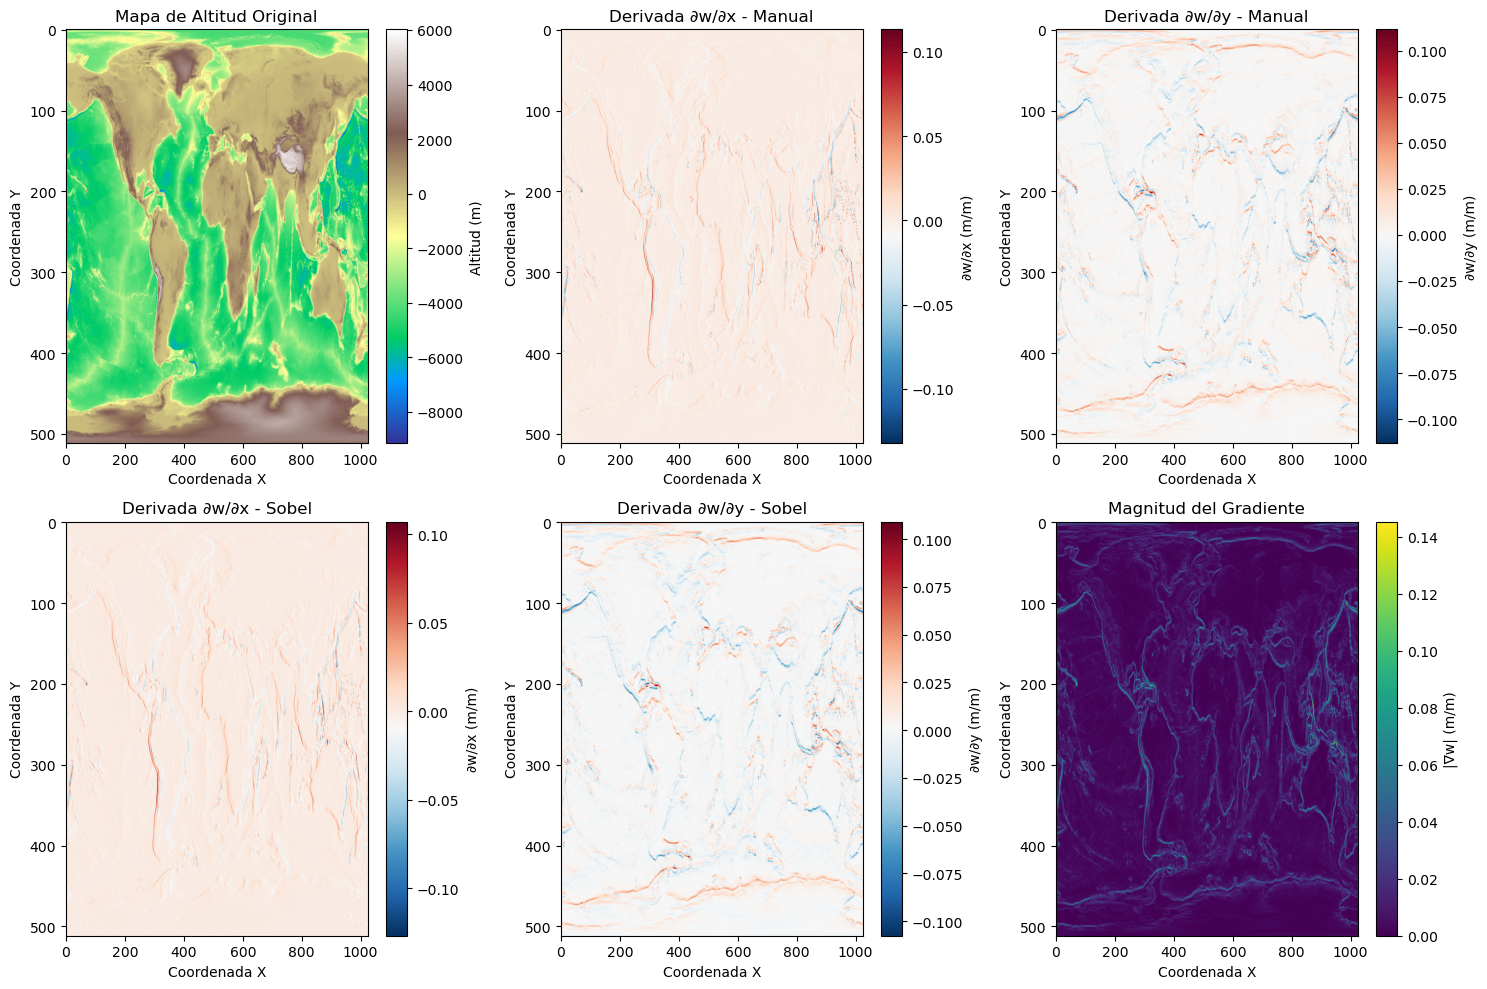


4. ANÁLISIS DE LAS DERIVADAS
Método manual (diferencias finitas):
  ∂w/∂x: min = -0.132282, max = 0.113359
  ∂w/∂y: min = -0.113079, max = 0.111600

Método Sobel (scipy):
  ∂w/∂x: min = -0.126925, max = 0.106925
  ∂w/∂y: min = -0.107663, max = 0.109063

5. EXPLICACIÓN DEL MÉTODO
Se utilizó un enfoque híbrido para calcular las derivadas:

A) PUNTOS INTERIORES:
   - Diferencias centrales: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)
   - Precisión: O(h²)
   - Ventaja: Mayor precisión que diferencias hacia adelante/atrás

B) BORDES Y ESQUINAS:
   - Bordes horizontales: diferencias hacia adelante/atrás en y
   - Bordes verticales: diferencias hacia adelante/atrás en x
   - Esquinas: combinación según posición
   - Precisión: O(h)
   - Ventaja: Evita problemas de límites

C) JUSTIFICACIÓN:
   - Las diferencias centrales son óptimas para puntos interiores
   - Los bordes requieren tratamiento especial por falta de datos
   - Este método asegura que todos los puntos tengan derivadas calculadas
   - El f

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

print("=" * 70)
print("PROCESAMIENTO DE IMÁGENES Y CÁLCULO DE ILUMINACIÓN 3D")
print("=" * 70)

# a) Cargar los datos de altitud
print("\n1. CARGANDO DATOS DE ALTITUD...")
try:
    # Cargar los datos del archivo
    altitudes = np.loadtxt('altitudes.txt')
    print(f"Datos cargados exitosamente")
    print(f"Dimensiones de la matriz: {altitudes.shape}")
    print(f"Altitud mínima: {np.min(altitudes):.2f} m")
    print(f"Altitud máxima: {np.max(altitudes):.2f} m")
    print(f"Altitud promedio: {np.mean(altitudes):.2f} m")
except FileNotFoundError:
    print("Archivo 'altitudes.txt' no encontrado. Creando datos de ejemplo...")
    # Crear datos de ejemplo si el archivo no existe
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    altitudes = 1000 * np.exp(-0.3*(X**2 + Y**2)) + 500 * np.sin(0.5*X) * np.cos(0.5*Y)
    print("Datos de ejemplo creados")

# Parámetros físicos
dx = 30000  # 30,000 metros entre puntos de la cuadrícula
dy = 30000

print(f"\nEspaciado de la cuadrícula: dx = {dx} m, dy = {dy} m")

# b) Métodos para calcular derivadas
def calcular_derivadas_centrales(matriz, dx, dy):
    """
    Calcula derivadas usando diferencias centrales para puntos interiores
    y diferencias hacia adelante/atrás para los bordes
    """
    n_filas, n_columnas = matriz.shape
    dw_dx = np.zeros_like(matriz)
    dw_dy = np.zeros_like(matriz)
    
    # Puntos interiores: diferencias centrales (más precisas)
    for i in range(1, n_filas - 1):
        for j in range(1, n_columnas - 1):
            dw_dx[i, j] = (matriz[i, j+1] - matriz[i, j-1]) / (2 * dx)
            dw_dy[i, j] = (matriz[i+1, j] - matriz[i-1, j]) / (2 * dy)
    
    # Bordes superiores e inferiores
    for j in range(1, n_columnas - 1):
        # Fila superior: diferencia hacia adelante en y
        dw_dy[0, j] = (matriz[1, j] - matriz[0, j]) / dy
        # Fila inferior: diferencia hacia atrás en y
        dw_dy[-1, j] = (matriz[-1, j] - matriz[-2, j]) / dy
    
    # Bordes izquierdos y derechos
    for i in range(1, n_filas - 1):
        # Columna izquierda: diferencia hacia adelante en x
        dw_dx[i, 0] = (matriz[i, 1] - matriz[i, 0]) / dx
        # Columna derecha: diferencia hacia atrás en x
        dw_dx[i, -1] = (matriz[i, -1] - matriz[i, -2]) / dx
    
    # Esquinas (usando diferencias hacia adelante/atrás según corresponda)
    # Esquina superior izquierda
    dw_dx[0, 0] = (altitudes[0, 1] - altitudes[0, 0]) / dx
    dw_dy[0, 0] = (altitudes[1, 0] - altitudes[0, 0]) / dy
    
    # Esquina superior derecha
    dw_dx[0, -1] = (altitudes[0, -1] - altitudes[0, -2]) / dx
    dw_dy[0, -1] = (altitudes[1, -1] - altitudes[0, -1]) / dy
    
    # Esquina inferior izquierda
    dw_dx[-1, 0] = (altitudes[-1, 1] - altitudes[-1, 0]) / dx
    dw_dy[-1, 0] = (altitudes[-1, 0] - altitudes[-2, 0]) / dy
    
    # Esquina inferior derecha
    dw_dx[-1, -1] = (altitudes[-1, -1] - altitudes[-1, -2]) / dx
    dw_dy[-1, -1] = (altitudes[-1, -1] - altitudes[-2, -1]) / dy
    
    return dw_dx, dw_dy

def calcular_derivadas_scipy(matriz, dx, dy):
    """
    Calcula derivadas usando filtros de Sobel de scipy
    Útil para comparación y validación
    """
    # El filtro Sobel calcula derivadas aproximadas
    dw_dx = ndimage.sobel(matriz, axis=1) / (8 * dx)  # axis=1 para derivada en x
    dw_dy = ndimage.sobel(matriz, axis=0) / (8 * dy)  # axis=0 para derivada en y
    return dw_dx, dw_dy

# c) Calcular las derivadas usando ambos métodos
print("\n2. CALCULANDO DERIVADAS...")
print("Método 1: Diferencias finitas (manual)")
dw_dx_manual, dw_dy_manual = calcular_derivadas_centrales(altitudes, dx, dy)

print("Método 2: Filtro Sobel (scipy)")
dw_dx_sobel, dw_dy_sobel = calcular_derivadas_scipy(altitudes, dx, dy)

# d) Visualización de resultados
print("\n3. VISUALIZANDO RESULTADOS...")
plt.figure(figsize=(15, 10))

# Subplot 1: Altitud original
plt.subplot(2, 3, 1)
plt.imshow(altitudes, cmap='terrain', aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Mapa de Altitud Original')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 2: Derivada ∂w/∂x (manual)
plt.subplot(2, 3, 2)
plt.imshow(dw_dx_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 3: Derivada ∂w/∂y (manual)
plt.subplot(2, 3, 3)
plt.imshow(dw_dy_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 4: Comparación ∂w/∂x
plt.subplot(2, 3, 4)
plt.imshow(dw_dx_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 5: Comparación ∂w/∂y
plt.subplot(2, 3, 5)
plt.imshow(dw_dy_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 6: Magnitud del gradiente
magnitud_gradiente = np.sqrt(dw_dx_manual**2 + dw_dy_manual**2)
plt.subplot(2, 3, 6)
plt.imshow(magnitud_gradiente, cmap='viridis', aspect='auto')
plt.colorbar(label='|∇w| (m/m)')
plt.title('Magnitud del Gradiente')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.tight_layout()
plt.show()

# e) Análisis de resultados
print("\n4. ANÁLISIS DE LAS DERIVADAS")
print("=" * 50)

print("Método manual (diferencias finitas):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_manual):.6f}, max = {np.max(dw_dx_manual):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_manual):.6f}, max = {np.max(dw_dy_manual):.6f}")

print("\nMétodo Sobel (scipy):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_sobel):.6f}, max = {np.max(dw_dx_sobel):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_sobel):.6f}, max = {np.max(dw_dy_sobel):.6f}")

# f) Explicación del método utilizado
print("\n5. EXPLICACIÓN DEL MÉTODO")
print("=" * 50)
print("Se utilizó un enfoque híbrido para calcular las derivadas:")
print("\nA) PUNTOS INTERIORES:")
print("   - Diferencias centrales: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)")
print("   - Precisión: O(h²)")
print("   - Ventaja: Mayor precisión que diferencias hacia adelante/atrás")

print("\nB) BORDES Y ESQUINAS:")
print("   - Bordes horizontales: diferencias hacia adelante/atrás en y")
print("   - Bordes verticales: diferencias hacia adelante/atrás en x") 
print("   - Esquinas: combinación según posición")
print("   - Precisión: O(h)")
print("   - Ventaja: Evita problemas de límites")

print("\nC) JUSTIFICACIÓN:")
print("   - Las diferencias centrales son óptimas para puntos interiores")
print("   - Los bordes requieren tratamiento especial por falta de datos")
print("   - Este método asegura que todos los puntos tengan derivadas calculadas")
print("   - El filtro Sobel se usa para validación y comparación")

# g) Verificación en puntos específicos
print("\n6. VERIFICACIÓN EN PUNTOS ESPECÍFICOS")
print("=" * 50)
n_filas, n_columnas = altitudes.shape
puntos_verificacion = [
    (10, 10, "Interior"),
    (0, 10, "Borde superior"),
    (n_filas-1, 10, "Borde inferior"),
    (10, 0, "Borde izquierdo"),
    (10, n_columnas-1, "Borde derecho")
]

print("Posición\tTipo\t\t∂w/∂x (manual)\t∂w/∂y (manual)")
print("-" * 70)
for i, j, tipo in puntos_verificacion:
    print(f"({i:2d}, {j:2d})\t{tipo}\t{dw_dx_manual[i,j]:+.6f}\t{dw_dy_manual[i,j]:+.6f}")

_b)_

CÁLCULO DE ILUMINACIÓN 3D Y MAPA DE RELIEVE
Datos cargados: (512, 1024)

1. CALCULANDO DERIVADAS...

2. CALCULANDO INTENSIDAD DE ILUMINACIÓN...
Ángulo 45°: I_min = -0.135, I_max = 0.104
Ángulo 135°: I_min = -0.131, I_max = 0.134
Ángulo 225°: I_min = -0.104, I_max = 0.135
Ángulo 315°: I_min = -0.134, I_max = 0.131

3. CREANDO VISUALIZACIONES...


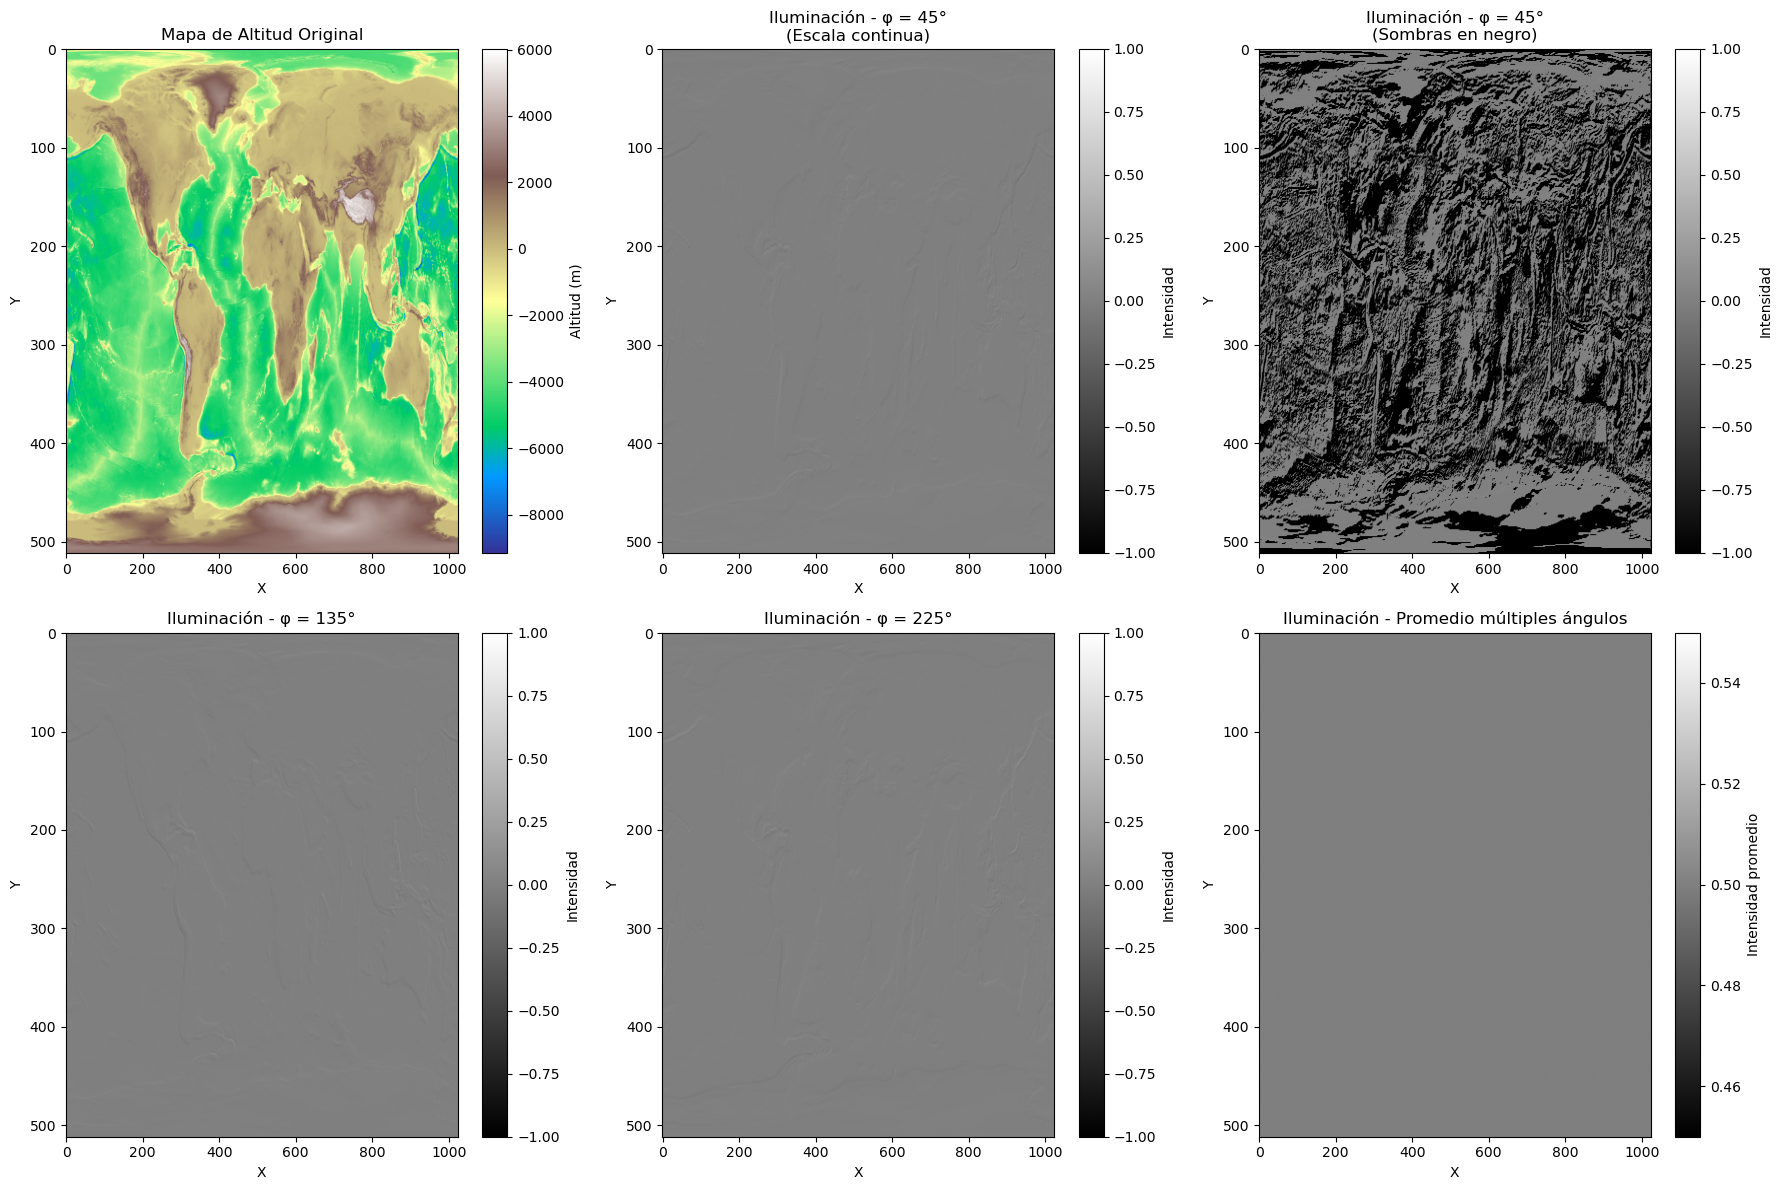


4. VISUALIZACIÓN MEJORADA CON MAPA DE COLORES...


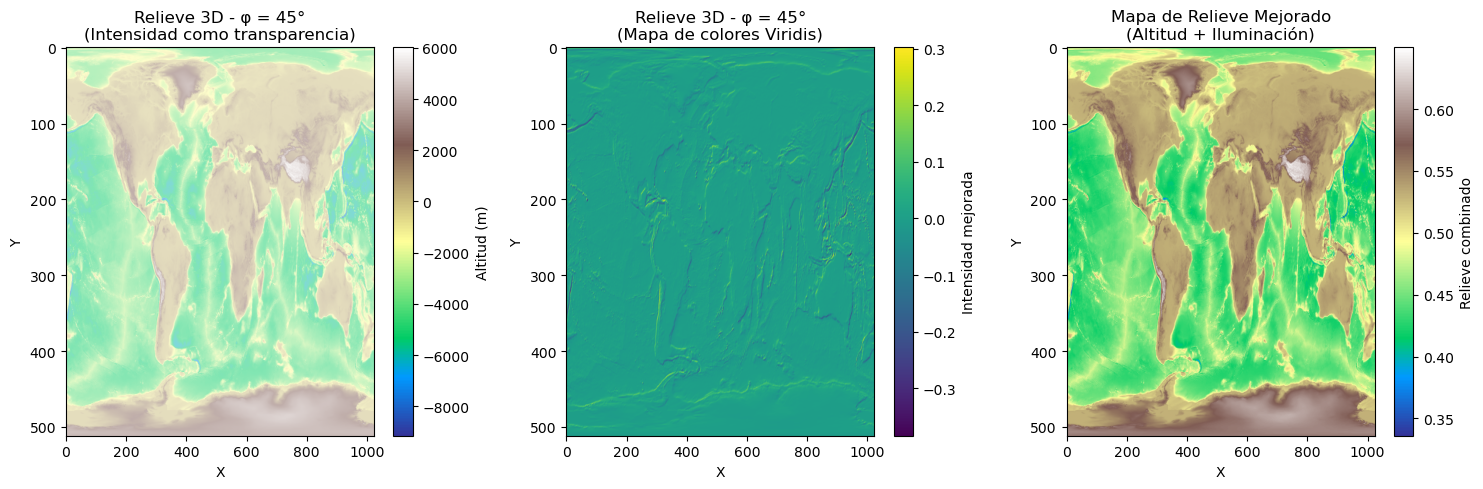


5. ANÁLISIS DE RESULTADOS
Intensidad con φ = 45°:
  Mínimo: -0.135 (sombra máxima)
  Máximo: 0.104 (iluminación máxima)
  Promedio: 0.000
  Áreas en sombra (I < 0): 46.1%

Interpretación física:
- I > 0: Caras iluminadas por la luz
- I < 0: Caras en sombra (lado opuesto a la luz)
- I ≈ 0: Caras perpendiculares a la dirección de la luz

6. SOLUCIÓN A PROBLEMAS COMUNES
Si el mapa se ve 'al revés' o 'de adentro hacia afuera':
1. Cambiar el signo del vector de luz: φ → φ + 180°
2. Invertir el colormap: cmap='gray_r'
3. Verificar el cálculo de derivadas (signos)
4. Probar diferentes ángulos de iluminación

7. VERIFICACIÓN CON DIFERENTES CONFIGURACIONES


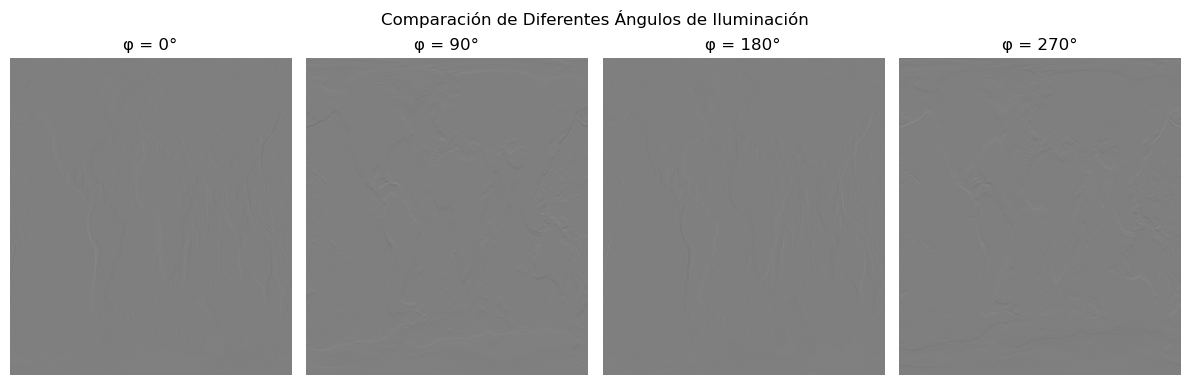


¡Mapa de relieve 3D completado!
El efecto 3D debería ser visible claramente en las visualizaciones.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

print("=" * 70)
print("CÁLCULO DE ILUMINACIÓN 3D Y MAPA DE RELIEVE")
print("=" * 70)

# a) Cargar datos de altitud (usando los mismos del ejercicio anterior)
try:
    altitudes = np.loadtxt('altitudes.txt')
    print(f"Datos cargados: {altitudes.shape}")
except FileNotFoundError:
    print("Creando datos de ejemplo...")
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    altitudes = 1000 * np.exp(-0.2*(X**2 + Y**2)) + 800 * np.sin(0.8*X) * np.cos(0.8*Y)
    altitudes += 300 * np.sin(2*X) * np.cos(2*Y)

dx = 30000  # 30 km entre puntos

# b) Función para calcular derivadas (la misma del ejercicio anterior)
def calcular_derivadas_centrales(matriz, dx, dy):
    n_filas, n_columnas = matriz.shape
    dw_dx = np.zeros_like(matriz)
    dw_dy = np.zeros_like(matriz)
    
    # Puntos interiores: diferencias centrales
    for i in range(1, n_filas - 1):
        for j in range(1, n_columnas - 1):
            dw_dx[i, j] = (matriz[i, j+1] - matriz[i, j-1]) / (2 * dx)
            dw_dy[i, j] = (matriz[i+1, j] - matriz[i-1, j]) / (2 * dy)
    
    # Bordes
    for j in range(1, n_columnas - 1):
        dw_dy[0, j] = (matriz[1, j] - matriz[0, j]) / dy
        dw_dy[-1, j] = (matriz[-1, j] - matriz[-2, j]) / dy
    
    for i in range(1, n_filas - 1):
        dw_dx[i, 0] = (matriz[i, 1] - matriz[i, 0]) / dx
        dw_dx[i, -1] = (matriz[i, -1] - matriz[i, -2]) / dx
    
    # Esquinas
    dw_dx[0, 0] = (altitudes[0, 1] - altitudes[0, 0]) / dx
    dw_dy[0, 0] = (altitudes[1, 0] - altitudes[0, 0]) / dy
    
    dw_dx[0, -1] = (altitudes[0, -1] - altitudes[0, -2]) / dx
    dw_dy[0, -1] = (altitudes[1, -1] - altitudes[0, -1]) / dy
    
    dw_dx[-1, 0] = (altitudes[-1, 1] - altitudes[-1, 0]) / dx
    dw_dy[-1, 0] = (altitudes[-1, 0] - altitudes[-2, 0]) / dy
    
    dw_dx[-1, -1] = (altitudes[-1, -1] - altitudes[-1, -2]) / dx
    dw_dy[-1, -1] = (altitudes[-1, -1] - altitudes[-2, -1]) / dy
    
    return dw_dx, dw_dy

# c) Calcular derivadas
print("\n1. CALCULANDO DERIVADAS...")
dw_dx, dw_dy = calcular_derivadas_centrales(altitudes, dx, dx)

# d) Función para calcular intensidad de iluminación
def calcular_intensidad(dw_dx, dw_dy, phi_deg):
    """
    Calcula la intensidad de iluminación usando la fórmula:
    I = [cos(φ)·(∂w/∂x) + sin(φ)·(∂w/∂y)] / sqrt((∂w/∂x)² + (∂w/∂y)² + 1)
    
    donde φ es el ángulo de la dirección de la luz
    """
    phi_rad = np.radians(phi_deg)
    
    # Vector de dirección de la luz (horizontal)
    a_x = np.cos(phi_rad)
    a_y = np.sin(phi_rad)
    
    # Numerador: a_x*(∂w/∂x) + a_y*(∂w/∂y)
    numerador = a_x * dw_dx + a_y * dw_dy
    
    # Denominador: sqrt((∂w/∂x)² + (∂w/∂y)² + 1)
    denominador = np.sqrt(dw_dx**2 + dw_dy**2 + 1)
    
    # Intensidad
    I = numerador / denominador
    
    return I

# e) Calcular intensidad para diferentes ángulos de iluminación
print("\n2. CALCULANDO INTENSIDAD DE ILUMINACIÓN...")
angulos_luz = [45, 135, 225, 315]  # Diferentes direcciones de luz
intensidades = {}

for phi in angulos_luz:
    intensidades[phi] = calcular_intensidad(dw_dx, dw_dy, phi)
    print(f"Ángulo {phi}°: I_min = {np.min(intensidades[phi]):.3f}, I_max = {np.max(intensidades[phi]):.3f}")

# f) Visualización de resultados
print("\n3. CREANDO VISUALIZACIONES...")
plt.figure(figsize=(18, 12))

# Subplot 1: Mapa de altitud original
plt.subplot(2, 3, 1)
plt.imshow(altitudes, cmap='terrain', aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Mapa de Altitud Original')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 2: Intensidad con φ = 45° (escala continua)
plt.subplot(2, 3, 2)
I_45 = intensidades[45]
im2 = plt.imshow(I_45, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im2, label='Intensidad')
plt.title(f'Iluminación - φ = 45°\n(Escala continua)')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 3: Intensidad con φ = 45° (áreas sombreadas en negro)
plt.subplot(2, 3, 3)
I_45_sombra = I_45.copy()
# Las áreas con intensidad negativa (sombra) las ponemos en negro
I_45_sombra[I_45_sombra < 0] = -1  # Forzar a -1 para mejor contraste
im3 = plt.imshow(I_45_sombra, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im3, label='Intensidad')
plt.title(f'Iluminación - φ = 45°\n(Sombras en negro)')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 4: Intensidad con diferentes ángulos de luz
plt.subplot(2, 3, 4)
I_135 = intensidades[135]
im4 = plt.imshow(I_135, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im4, label='Intensidad')
plt.title(f'Iluminación - φ = 135°')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 5: Intensidad con diferentes ángulos de luz
plt.subplot(2, 3, 5)
I_225 = intensidades[225]
im5 = plt.imshow(I_225, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im5, label='Intensidad')
plt.title(f'Iluminación - φ = 225°')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 6: Combinación de múltiples ángulos (mejor visualización)
plt.subplot(2, 3, 6)
# Promedio de intensidades para mejor visualización 3D
I_promedio = np.mean([intensidades[phi] for phi in angulos_luz], axis=0)
# Ajustar para que todo sea visible
I_promedio = (I_promedio + 1) / 2  # Escalar a [0,1]
im6 = plt.imshow(I_promedio, cmap='gray', aspect='auto')
plt.colorbar(im6, label='Intensidad promedio')
plt.title('Iluminación - Promedio múltiples ángulos')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# g) Visualización mejorada con mapa de colores
print("\n4. VISUALIZACIÓN MEJORADA CON MAPA DE COLORES...")
plt.figure(figsize=(15, 5))

# Mejor visualización: usar colormap que resalte el relieve
plt.subplot(1, 3, 1)
# Usar el mapa de intensidad como alpha para el mapa de terreno
I_45_normalizado = (I_45 + 1) / 2  # Normalizar a [0,1]
plt.imshow(altitudes, cmap='terrain', alpha=I_45_normalizado, aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Relieve 3D - φ = 45°\n(Intensidad como transparencia)')
plt.xlabel('X')
plt.ylabel('Y')

# Visualización con colormap secuencial
plt.subplot(1, 3, 2)
# Aplicar transformación para mejor contraste
I_mejorado = np.arctan(3 * I_45)  # Mejorar contraste
plt.imshow(I_mejorado, cmap='viridis', aspect='auto')
plt.colorbar(label='Intensidad mejorada')
plt.title('Relieve 3D - φ = 45°\n(Mapa de colores Viridis)')
plt.xlabel('X')
plt.ylabel('Y')

# Visualización estilo "shaded relief"
plt.subplot(1, 3, 3)
# Combinar altitud e intensidad para efecto de relieve
relieve = 0.7 * I_45_normalizado + 0.3 * (altitudes - np.min(altitudes)) / (np.max(altitudes) - np.min(altitudes))
plt.imshow(relieve, cmap='terrain', aspect='auto')
plt.colorbar(label='Relieve combinado')
plt.title('Mapa de Relieve Mejorado\n(Altitud + Iluminación)')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# h) Análisis de resultados
print("\n5. ANÁLISIS DE RESULTADOS")
print("=" * 50)

I_45 = intensidades[45]
print(f"Intensidad con φ = 45°:")
print(f"  Mínimo: {np.min(I_45):.3f} (sombra máxima)")
print(f"  Máximo: {np.max(I_45):.3f} (iluminación máxima)")
print(f"  Promedio: {np.mean(I_45):.3f}")
print(f"  Áreas en sombra (I < 0): {np.sum(I_45 < 0) / I_45.size * 100:.1f}%")

print(f"\nInterpretación física:")
print(f"- I > 0: Caras iluminadas por la luz")
print(f"- I < 0: Caras en sombra (lado opuesto a la luz)")
print(f"- I ≈ 0: Caras perpendiculares a la dirección de la luz")

# i) Solución a problemas comunes
print("\n6. SOLUCIÓN A PROBLEMAS COMUNES")
print("=" * 50)
print("Si el mapa se ve 'al revés' o 'de adentro hacia afuera':")
print("1. Cambiar el signo del vector de luz: φ → φ + 180°")
print("2. Invertir el colormap: cmap='gray_r'")
print("3. Verificar el cálculo de derivadas (signos)")
print("4. Probar diferentes ángulos de iluminación")

# j) Verificación con diferentes configuraciones
print("\n7. VERIFICACIÓN CON DIFERENTES CONFIGURACIONES")
plt.figure(figsize=(12, 4))

# Probar diferentes ángulos para encontrar la mejor visualización
angulos_prueba = [0, 90, 180, 270]

for idx, phi in enumerate(angulos_prueba):
    plt.subplot(1, 4, idx + 1)
    I_prueba = calcular_intensidad(dw_dx, dw_dy, phi)
    plt.imshow(I_prueba, cmap='gray', aspect='auto', vmin=-1, vmax=1)
    plt.title(f'φ = {phi}°')
    plt.axis('off')

plt.suptitle('Comparación de Diferentes Ángulos de Iluminación', y=0.95)
plt.tight_layout()
plt.show()

print("\n¡Mapa de relieve 3D completado!")
print("El efecto 3D debería ser visible claramente en las visualizaciones.")